# Plotting

*Plotting is a core component of scientific work --- papers live and die by their plots. This is especially true in data science disciplnes. As such, attention and care must be taken to create informative and aesthetic images.*

Julia has a robust plotting ecosystem in the Plots.jl package which we will cover here. Other plotting enviroments including, but not limited too: Makie, AlgebraOfGraphics, and UnicodePlots. UnicodePlots is particularly excellent for plotting inside the REPL environment. In addition, there are several auxillary plotting packages and we will cover only one here: StatsPlots. The others will be specific to your individual project and can be found through your search engine.

The key outcomes of this workbook are:
1. Basic Plots, Plot Objects, and Exporting Images
2. Subplots and the Subplot Layout Macro
3. Plot series types: scatter, line, surface, and contours
4. 3D Plots
5. Statistics Plots
6. Manipulate Toolbars
7. Animations

First, we need to load the Plots.jl package and select the backend. If Plots.jl is not installed it can be by running:

``using Pkg
Pkg.add("Plots")``

In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

The ``pyplot()`` function sets the Plots.jl backend - the software used to run the plotting code. The plotting team is currently developing plotting in Julia native code but it is a large task and is not ready yet. Some backends may need their own packages to be installed using the inbuilt package manager but you will not have to interact with this package outside of installing int. The backend we have selected is the Python backend and requires Python to be installed on your computer. It also requires PyCall and PyPlot to be installed through Julia (if they are not already). To do this run:

``using Pkg
Pkg.add("PyCall")
Pkg.add("PyPlot")``

Plots are created with the ``plot()`` function in Plots and this is the main function you will be interacting with going forward. It has extensive functionality and is well documented at: [JuliaPlots](https://docs.juliaplots.org/). 

## 1.0 Basic Plotting
### 1.1 A Simple Plot
For now we will start simple: a plot of $f(x) = x^2$. We will define the plotting range on [0,1] with intervals of 0.01 and apply $f(x)$ to this range to create the plotting data. Then, we feed this into the ``plot`` function to generate the plot.

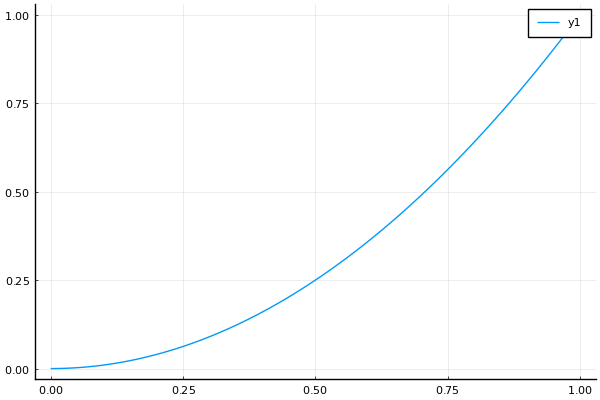

In [2]:
x = collect(0:0.01:1);
y = x .^ 2;
plot(x,y)

You might have noticed that took a while to generate --- upt to a minute on some computers! This is due to a large necessary precompilation time for the ``plot`` function. It also takes a substantial time to load the ``Plots.jl`` package. A datascience workflow is highly dependent on plots and to mitigate these high one-off costs it is highly recommended to work in either the REPL or a notebook where package loads and pre-compiling occurs only once as opposed to a terminal workflow which would require it to happen every time.

### 1.2 Plot Keywords

A key way of constructing a plot is to feed named keywords into the ``plot()`` function. Most of the labelling is quite intiutive but be sure to check the documentation for full list of options. Let's create the same plot with a title, labels, and a series label.

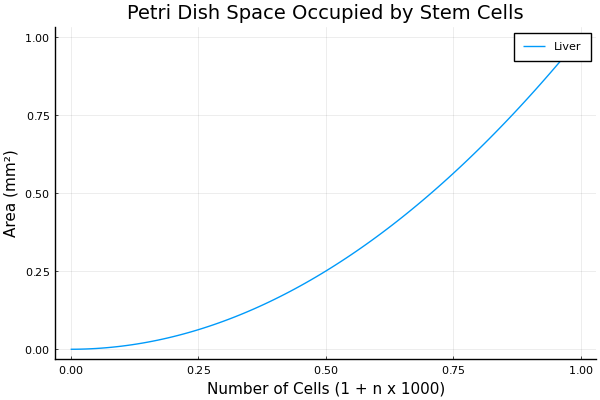

In [3]:
x = collect(0:0.01:1);
y = x .^ 2;
plot(x,y; title="Petri Dish Space Occupied by Stem Cells", xlabel="Number of Cells (1 + n x 1000)", ylabel="Area (mm²)", label="Liver")

### 1.3 Plot Objects

Every plot in julia is asscociated with a plot object. This allows for easy plot manipulation and for saving. The REPL remembers the last plot and can edit when no plot object is specified. This, however, is not recommended; a better practice is to give each object a variable name removing ambiguity. Let's recreate the first plot with a variable name.

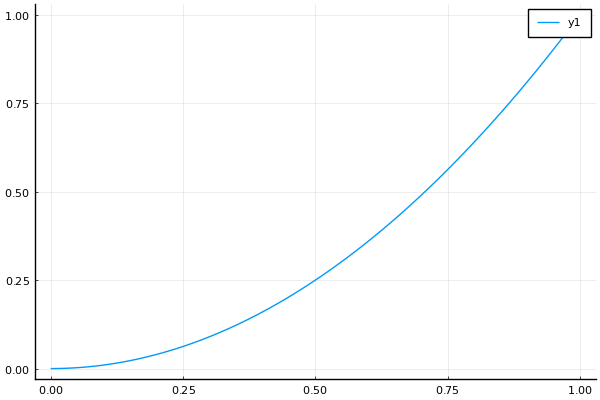

In [4]:
x = collect(0:0.01:1);
y = x .^ 2;
plt1 = plot(x,y)

### 1.4 Modifying Plots

The plot object ``plt1`` is again not very informative. To modify it we use an extension of the ``plot`` function: ``plot!``. The bang (!) operator in Julia is conventionally used to denote in-place modification and this is true for plots. The usage is simple: parse the plot variable as the first argument and every subsequent variable is identical to the ``plot`` function. Let's add a title, axes labels, and series label into the ``plt1`` object: 

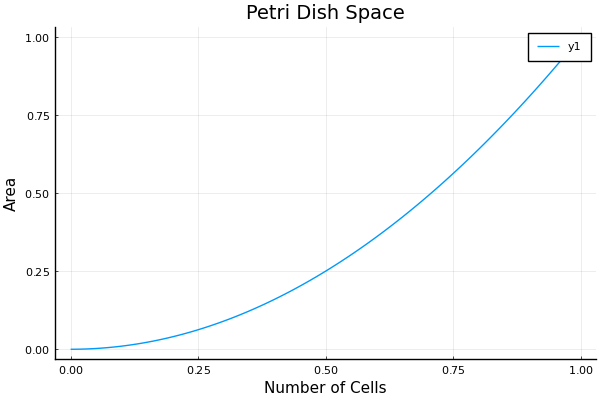

In [5]:
plot!(plt1;  title="Petri Dish Space", xlabel="Number of Cells", ylabel="Area")

Alternatively, we can modify the plot attributes by dedicated API calls. These will be familiar to those who have worked in a MATLAB environment. The full list of API calls can be found [here](https://docs.juliaplots.org/latest/api/). Let's fix the mistakes we made the first time.

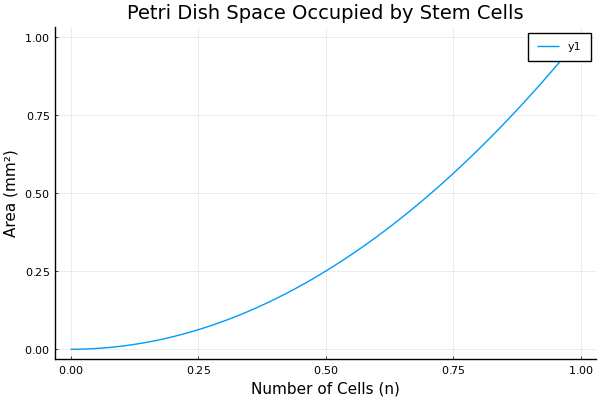

In [6]:
title!(plt1, "Petri Dish Space Occupied by Stem Cells")
xlabel!(plt1, "Number of Cells (n)")
ylabel!(plt1, "Area (mm²)")

Notice that we haven't modified the series label yet. This is the hardest attribute to modify as it doesn't have an API call and will not respond to the ``plot!`` function. To modify it we take the object-oriented approach by selecting the first series and changing the ``:label`` keyword.

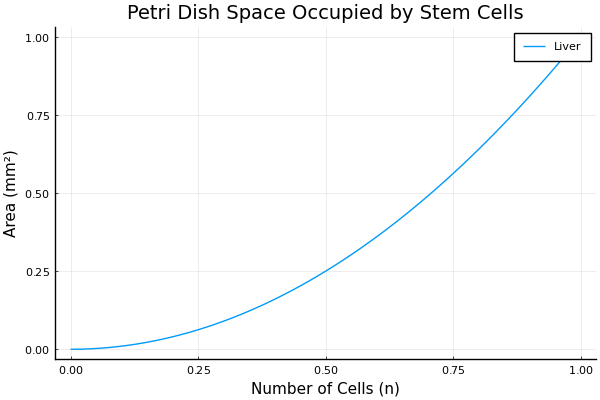

In [7]:
plt1[1][1][:label] = "Liver"
plt1

### 1.5 Mutliple Series

Often we want to display multiple series in the same plot. This can be handled in a single line, if you have the data defined before hand, or using the ``plot!`` function to append a series to an existing plot object. Let's add another cell type to our graph.

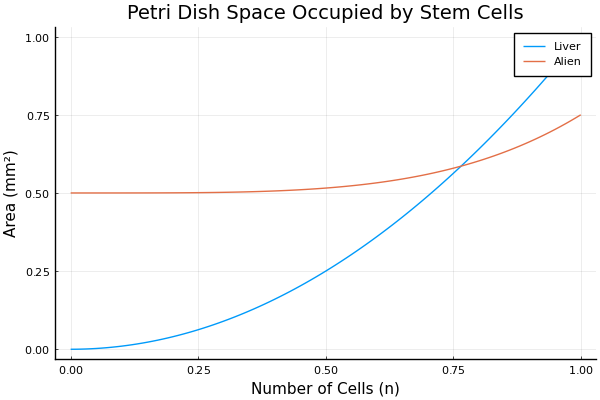

In [8]:
z = 0.5 .+  0.25 .* x .^ 4
plot!(plt1, x, z; label = "Alien")

There are several ways to plot multiple series of data with a single call to plot. The simplest logical structure to follow is feeding an x-axis range and a *space-delimited* vector of y-axis values: ``plot(x, [y1 y2 ...])``. This allows for an intiutive manipulation of the plot keywords which are given as a vector and broadcast to each series. Some useful series keywords are:

1. color = [:blue RGB(0,0,0)...]
2. linestyle = [:dashed ...]
3. linealpha = [0.4 ...]
4. label = ["Liver" "Heart" ...]


The full list can be found in the documentation.

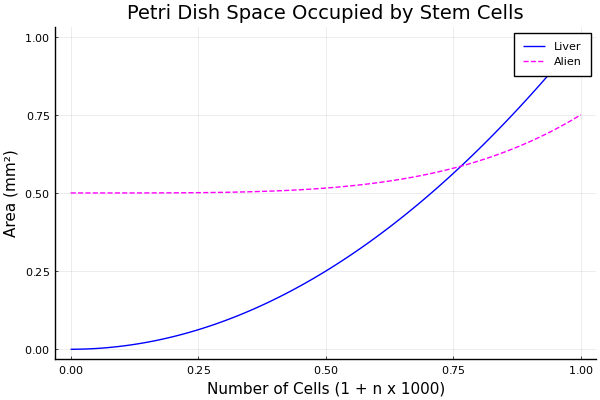

In [9]:
plt2 = plot(x, [y z];
    title="Petri Dish Space Occupied by Stem Cells", 
    xlabel="Number of Cells (1 + n x 1000)", 
    ylabel="Area (mm²)",
    color=[:blue RGB(1,0,1)],
    linestyle=[:solid :dash],
    label=["Liver" "Alien"])

### 1.6 Text

The text keyword is a useful but fiddly method for inserting custom text into an image. It can be called using the ``annotations`` keyword or the ``annotate!`` function. Each annotation is passed as a tuple (x, y, "text") where x and y denote the position on the plot the "text" will be placed. For advanced text manipulation you can use:

``Plots.text("string"; 
pointsize=Float64, 
halign=[:left, :right, :center], 
valign=[:top, :bottom, center], 
colour=RGBVal, 
rotation=Float64)``

Let's place a simple annotation in the top left and a complicated text object near the intersection.

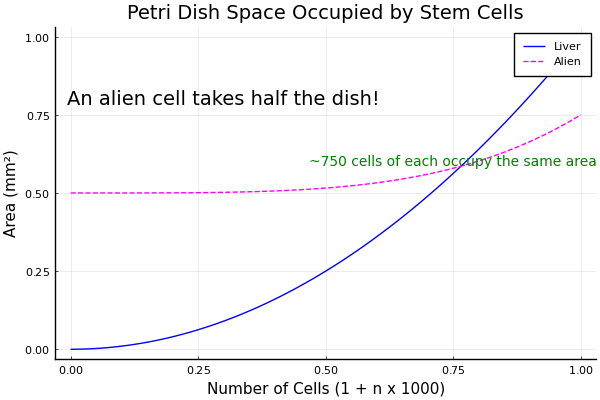

In [10]:
plt3 = plot(x, [y z];
    title="Petri Dish Space Occupied by Stem Cells", 
    xlabel="Number of Cells (1 + n x 1000)", 
    ylabel="Area (mm²)",
    color=[:blue RGB(1,0,1)],
    linestyle=[:solid :dash],
    label=["Liver" "Alien"],
    annotations=[(0.3,0.8,"An alien cell takes half the dish!"), (0.75, 0.6, Plots.text("~750 cells of each occupy the same area", halign=:center, pointsize=10, color=:green))])

### 1.6 Saving

Saving a plot is handled through the ``savefig`` call or a series of filetype specific API calls such as ``png``. The ``savefig`` call operates with two arguments referencing the plot object and save directory with file extension: ``savefig(obj, dir)``. If no plotting object is given then it refers to the last open plot object and saves it to the nonimated directory: ``savefig(dir)``. The directory is specified relative to the current working directory, is parsed as a string, and includes the file extension. The file extension allows the API to infer the format type the image should be saved as. [The documentation](https://docs.juliaplots.org/latest/output/) has a complete list of types and some useful ones include:

1. PNG
2. JPG
3. PDF
4. EPS
5. ...

Let's check the current directory with ``pwd()``.

In [11]:
pwd()

"/home/nicholas_gale/Documents/University/2022 (Postdoc Stephen and David)/Course - Scientific Programming/Workbooks"

Now let's save both the figures we have created; ``plt1`` as a PDF and ``plt2`` as a PNG. We will target the ``figs`` subdirectory.

In [12]:
savefig(plt1, "figs/plt1.pdf")
savefig(plt2, "figs/plt2.png")

## 2.0 Subplots

It is common for plots to be displayed side-by-side particularly if the information presented in each of them is related. There is extensive functionality for subplots in Julia which all benefit from plot objects. 

Let's imagine a situation where you as a researcher are making the case that some rodents are OK with being in proximity to cats so long as they are not too close. To do this you place the mouse into a harness and take measurements of its heart rate and eye-movement (attention) when a cat is placed a varying distances from it. You measure the following data and display it as graphs:

In [13]:
dist_cat = 0:0.01:1; # cats distance from mouse in (m)
eyes_mouse = 2 .* (1.2 .- dist_cat); # the quantified eye movements of a mouse
heart_mouse = (5 .* (0.3 .- dist_cat)) .^2 .* (dist_cat .< 0.3) .+ eyes_mouse .* (0.3 .< dist_cat .< 0.6) .+ 1.2 .* (0.6 .> dist_cat); # the heart-rate of the mouse

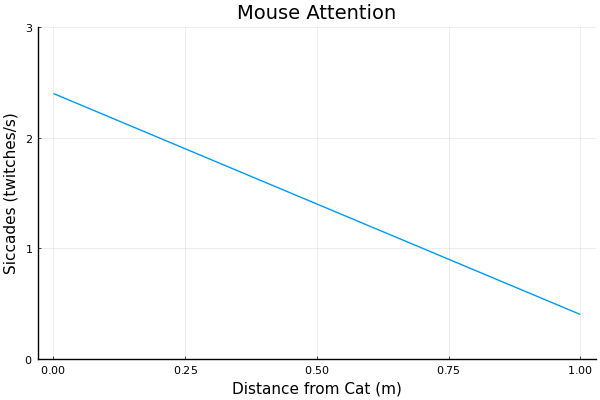

In [14]:
catandmouse_eyes = plot(dist_cat, eyes_mouse; title="Mouse Attention", xlabel="Distance from Cat (m)", ylabel = "Siccades (twitches/s)", yrange=(0,3), label=false)

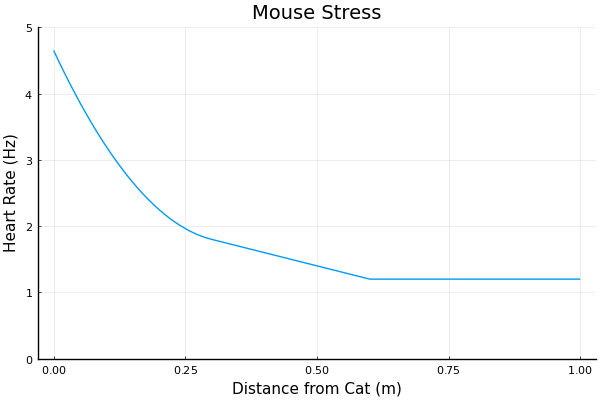

In [15]:
heart_mouse = (5 .* (0.3 .- dist_cat)) .^2 .* (dist_cat .< 0.3) .+ eyes_mouse .* (dist_cat .< 0.6) .+ 1.2 .* (0.6 .<= dist_cat); # the heart-rate of the mouse
catandmouse_heart = plot(dist_cat, heart_mouse; title="Mouse Stress", xlabel="Distance from Cat (m)", ylabel = "Heart Rate (Hz)", yrange=(0,5),label=false)

### 2.1 Basic Layout

It would be useful to plot these sets of data side-by-side as it is likely that they are related to each other. Since the both have the same range a simple layout will do. To create this layout we parse plot objects to the ``plot`` function with the keyword ``layout = (m,n)``. The keyword arranges a regular grid of dimensions m x n.

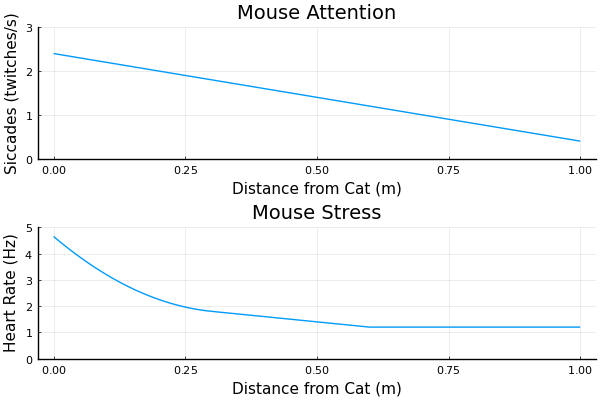

In [16]:
simplesubplot = plot(catandmouse_eyes, catandmouse_heart; layout=(2,1))

While the raw data is useful (and important) to display, it is unlikely that we will stop here. Instead we wish to communicate a hypothesis about what this data implies. The attention clearly scales linearly implying the cat becomes more of a concern the closer it comes to the mouse. The heart rate implies that the stress response of the mouse is highly non-linear: at large distances it is completely nonchalant, at medium distances stress rises proportionally to attention, then at some threshold it becomes increasingly stressful to be in close proximity. After thinking for a while we conjecture that these two variables can be combined into a readiness-to-move model which we denote $p$. Our model for p is simple $p = \text{attention} \cdot \text{heartrate}^{1/2}$. We plot p accordingly and combiine it into a new subplot:

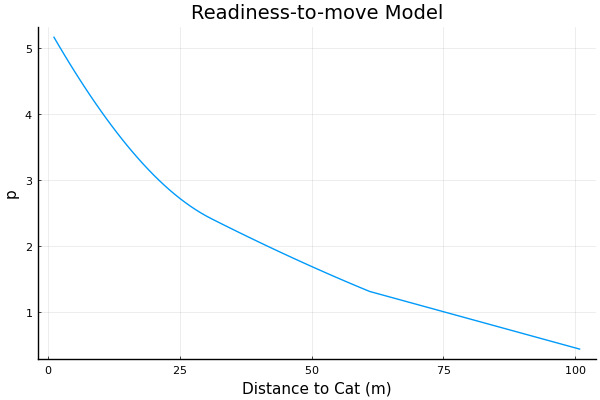

In [17]:
model = plot(eyes_mouse .* heart_mouse .^0.5; title="Readiness-to-move Model", xlabel="Distance to Cat (m)", ylabel="p", label=false)

This can be combined into a subplot with a (3,1) layout or a (2,2) layout:

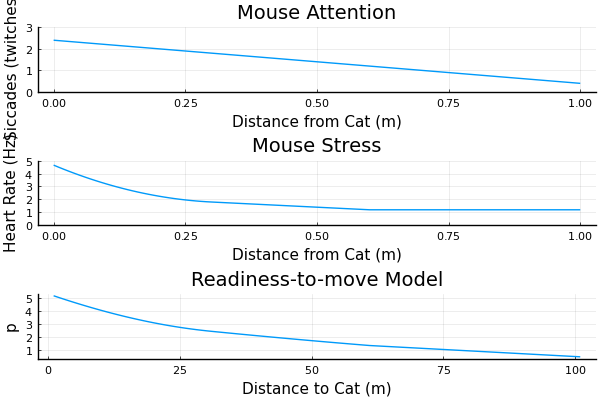

In [18]:
modelsubplot = plot(catandmouse_eyes, catandmouse_heart, model; layout=(3,1))

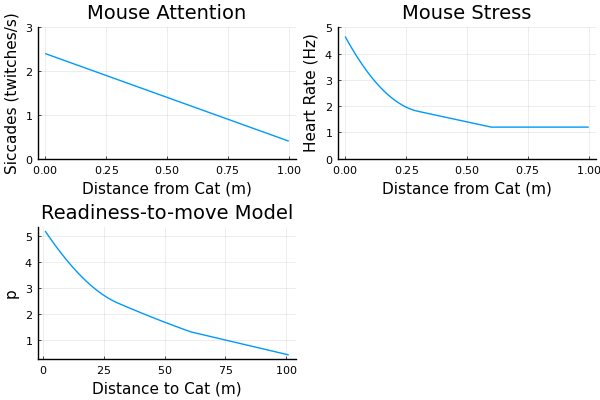

In [19]:
modelsubplot = plot(catandmouse_eyes, catandmouse_heart, model; layout=(2,2))

Unfortunately, neither of these look very good. In addition, they don't really convey the story that we are trying to tell very well. In fact, it looks like the model is a new source of data when really it is a hypothesis. After thinking some more we decide a top-down view of a mouse with coloured regions of response is the most appropriate way to display this data (after remembering that a mouses field of view is about 300 degrees. We will learn how to plot this ourselves later in the notebook but for now:

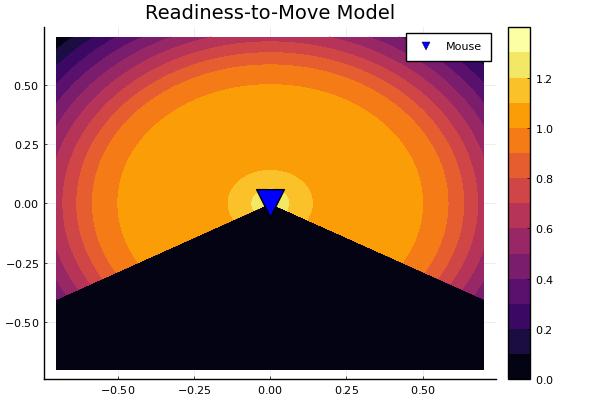

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [20]:
rho(r, t) = (abs(t) < 2pi/3) * ((5 * (0.3 - r) ^ 2 * (0 < r < 0.3) + (2 * r) * (r < 0.6) + 1.2 * (0.6 <= r))^0.5 * (2 * (1-r)))
p(x, y) = rho(sqrt(x^2 + y^2), atan(x,y)) 
dran = -0.7:0.001:0.7
modelplot = plot(dran, dran, p; st=:contourf, title="Readiness-to-Move Model")
plot!(modelplot, [0], [0]; st=:scatter, marker=(:dtriangle, :blue, 20), label="Mouse")

This looks more interpretable; a fellow researcher might look at the above diagram and intuit that the mouse is facing upwards and might immediately interpret this as a probability of a mouse running away if a cat appears in some location around it. They might also (unfortunately, correctly) identify that this is not a true probability model and point this out to us (and we accordingly curse Reviewer 2). Neverless, this conveys a clear picture of what we actually want to communicate: when do mice get so concerned by a cat that they run away? It is also useful to our colleagues because it provides a good mental model and a testable hypothesis.

### 2.2 @layout Macro

We would like to display our model alongside the data that allowed us to come up with it. This is helpful to guide the readers in understandind our thought process and reasoning. To convey this information usefully, however, it would be nice to have the model enlarged and the data side-by-side. To do this we need to use a custom layout which is implemented in Julia with the ``@layout`` macro.

``@layout`` is applied to a matrix-like vector which delimits column breaks with spaces and row breaks with semi-colons. Each internal plot-layout object is denoted with a letter (a,b,c...) or a layout object (grid(3,3)). Each of these objects have a grid size that can be denoted as a fraction of the total image space inside curly braces e.g. a{0.2h, 0.4w}. These rules can be applied recursively. We would like a simple layout where the data is displayed on top and the model on the bottom:

In [21]:
L = @layout [a{0.5w} b{0.5w}; c{0.7h}]

2×1 Matrix{Any}:
 Any[(label = :a, width = 0.5, height = :auto) (label = :b, width = 0.5, height = :auto)]
 (label = :c, width = :auto, height = 0.7)

This should give equal weighting to each of the data sources and introduce them first, but still give the largest visual weight to the model which, accordingly, carries the most weight in the scientific narrative we are crafting. To apply the layout we simply use the layout keyword, as before, but subsitute our new layout object: 

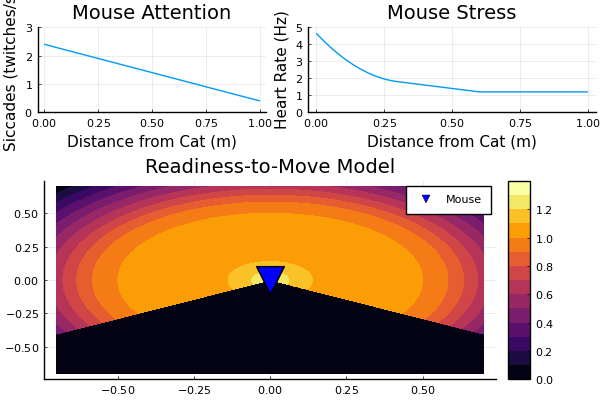

In [22]:
advancedmodelsubplot = plot(catandmouse_eyes, catandmouse_heart, modelplot; layout=L)

## 3.0 Advanced Plots

Julia has first class support for a wide variety of useful plotting structures. These are typically given by the ``plot`` keyword argument ``seriestype`` or ``st`` for short. [The documentation](https://docs.juliaplots.org/latest/) gives a complete list but some typically useful types are:

1. scatter
2. contour and contourf
3. lineplot

Julia also has support for 3D plotting and for user defined recipes.

### 3.1 Scatter Plots

Scatter plots are extremely useful for visualising distinct data points in a 2D plane. Suppose that you have a series of datter points (xi, yi). Let x and y be vectors containing the x and y coordinates respectively. There are two methods to construct scatter plots with these points in Julia: ``scatter(x,y)`` or ``plot(x,y ; seriestype=:scatter)``. While the first will be familiar coming from other languages you may find the second to be grammatically consistent and useful if you want to easily switch between other plotting types.

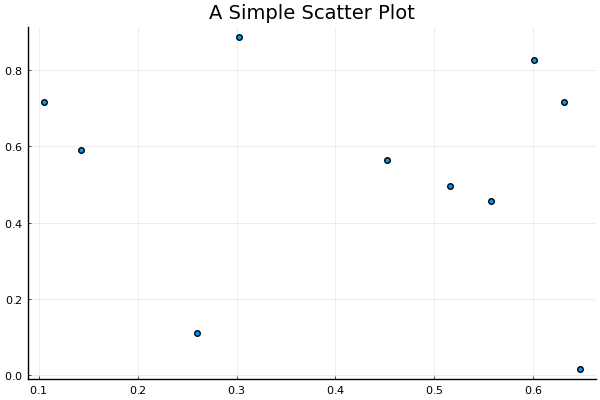

In [23]:
x = rand(10);
y = rand(10);
sctplt1 = plot(x,y; seriestype=:scatter, title="A Simple Scatter Plot", label=false)

It is simple to add more points to the scatter plot using the bang (!) operator. Let x2 and y2 be vectors of new points and add them using: ``plot!(pltobj, x2, y2; st=:scatter)``. Let's add a few points in red to our scatter plot. 

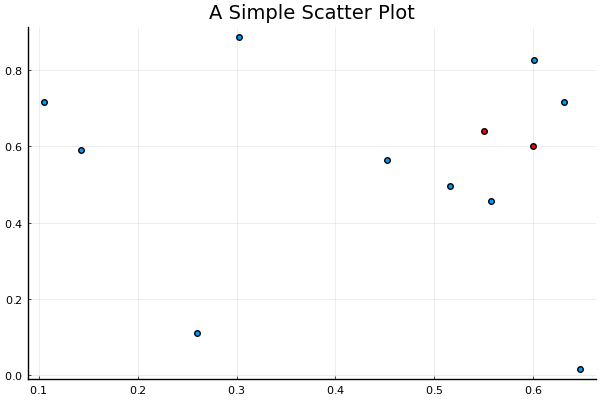

In [24]:
plot!(sctplt1, [0.6, 0.55], [0.6, 0.64]; st=:scatter, c=:red, label=false)

This is a useful operation particularly in the context of a loop over a data iterable such as a DataFrame:

``for i in data
        plot!(pltobj, [i[:x]], [i[:y]]; st=:scatter, *keywords=f(i[n]))
end
``

where :x and :y are factors in the dataframe and \*keywords indicates one of the plotting keywords and i[n] indicates a factor in the DataFrame corresponding to a setting for that keyword.

The vectorised keywords arguments demonstrated in the simple plots work especially well in scatter plots and can be very useful for making customisable graphics. Let's make a new scatter plot with mutliple colours, sizes, point types, and transparency using the keywords: ``colour, markersize, markershape, markeralpha``. The vector that applies these options to each point will *not* be space delimited because these points are all part of the same data series unlike in our simple plot above. The list of marker options can be found in the [documentation](https://docs.juliaplots.org/stable/generated/supported/#Markers). We will also turn the ticks off on the axes and a frame around the plot using the keywords: ``ticks`` and ``frame``.

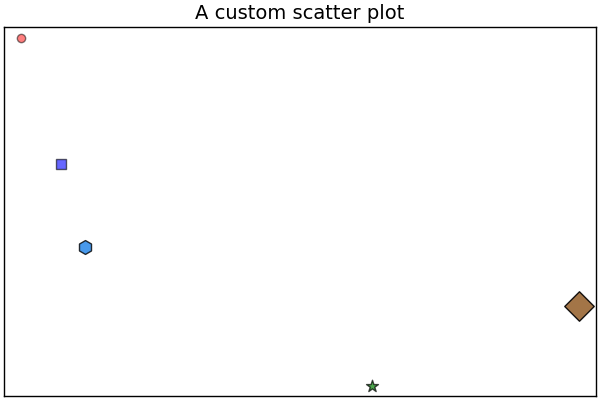

In [25]:
a = [0.1, 0.15, 0.54, 0.18, 0.8];
b = [0.892,0.614, 0.125, 0.43, 0.3];
sctplt2 = plot(a, b; 
    title="A custom scatter plot", 
    st=:scatter, 
    markercolour=[:red, :blue, :green, RGB(0.1,0.5,0.9), RGB(0.6,0.4,0.2)], 
    markershape=[:circle, :square, :star, :hexagon, :diamond],
    markersize=[6,7,9,10,15], 
    markeralpha=[0.5,0.6,0.7,0.8,0.9], 
    tick=false, 
    frame=true,
    label=false)

### 3.2 Contour Plots

Contour plots are useful for plotting continuously varying 2D data. They work by mapping the value of the data at a point (x,y) to a colour and joining equal colour values with a line. The name comes from the old contour maps which connected the heights of various locations of a landscape mapping out its contours. In Julia can be produced using the ``plot`` keyword ``seriestype=:contour`` or the dedicated API call ``contour``. To produce it you need a grid of x and y points as well as the function value at each of these points. Alternatively, you can just parse the matrix of function values but this will display the axes incorrectly. The following workflow is a common way to produce a contour plot: 

In [26]:
x = 0:0.01:1; # set the range of x-values
y = 0:0.001:0.5 # set the range of y-values, note that they are different lengths
X = repeat(reshape(x, 1, :), length(y), 1); # create an X-matrix where x values are repeatedly copied into length(y)-columns and vary along rows
Y = repeat(y, 1, length(x)); # create a Y-matrix where y values are repeatedly copied into length(x) rows and vary along columns
println(size(X))
println(size(Y))

(501, 101)
(501, 101)


We now have a set of matrices X, Y with dimensions (length(x) x length(y)) allowing our x and y data to form a grid over the defined ranges. This is an intitutive (and canonical) mapping from the range generators to the data structure. Let's now define the contour data. We will use a slightly complicated function: $f(x, y) = \sin(5 \pi \cdot x \cdot y) + x^2 - y^2$.

In [27]:
f(x,y) = sin(5 * pi * x * y)  + x^2 - y^3
Z = f.(X, Y)

501×101 Matrix{Float64}:
  0.0        0.0001       0.0004       …  0.9604    0.9801   1.0
 -1.0e-9     0.000257079  0.000714158     0.975793  0.99565  1.01571
 -8.0e-9     0.000414151  0.00102831      0.991183  1.0112   1.03141
 -2.7e-8     0.000571212  0.00134245      1.00656   1.02674  1.04711
 -6.4e-8     0.000728254  0.00165657      1.02194   1.04226  1.06279
 -1.25e-7    0.000885273  0.00197067   …  1.03729   1.05778  1.07846
 -2.16e-7    0.00104226   0.00228474      1.05263   1.07327  1.09411
 -3.43e-7    0.00119921   0.00259877      1.06795   1.08874  1.10973
 -5.12e-7    0.00135612   0.00291276      1.08324   1.10419  1.12533
 -7.29e-7    0.00151299   0.0032267       1.0985    1.1196   1.1409
 -1.0e-6     0.0016698    0.00354059   …  1.11373   1.13498  1.15643
 -1.331e-6   0.00182654   0.00385441      1.12892   1.15033  1.17193
 -1.728e-6   0.00198323   0.00416817      1.14408   1.16563  1.18738
  ⋮                                    ⋱                     ⋮
 -0.11693   -0.04009

We now have the data and are ready to plot the contours. We will plot two contour here: with the grid, and without. We will also use the keyword argument ``legend`` in the second plot to toggle the colorbar.

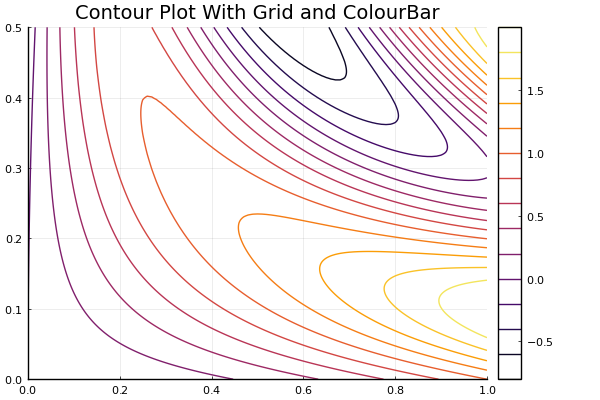

In [28]:
ctplt1 = plot(X, Y, Z; seriestype=:contour, title="Contour Plot With Grid and ColourBar")

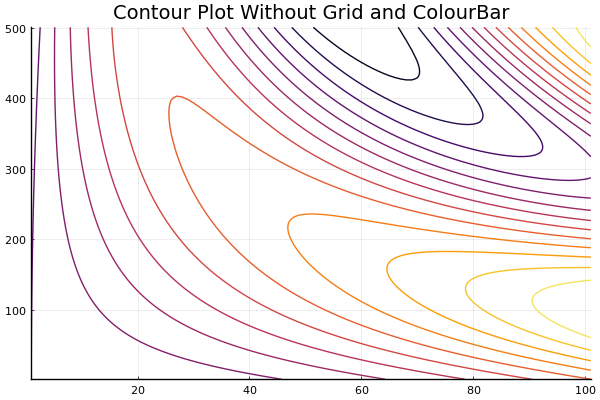

In [29]:
ctplt2 = plot(Z; seriestype=:contour, title="Contour Plot Without Grid and ColourBar", legend=false)

In both cases the contours appear identical but the first plot is dramatically more informative. It shows the correct range in both axes and gives a legend to understand what each of the colour contours actually means. Notice that no ``legend`` keyword was given and so the colourbar is enabled by default. The second plot simply gives you a *feel* for the data and the axes tell you how many points where used to generate that data giving a rough feel for the resolution i.e. the matrix size. This is helpful if you have just imported a series of data and want to get a quick feel for it.

#### 3.2.1 Contourf

We often find that data is continuous (as in the example above) and can be interpolated. You might have been doing this intuitively using the visual cues in the above example. By using the ``contourf`` keyword or the ``contouf`` API the Plots package will fill in these contour lines making it much easier (usually) to visualise. Another useful feature in contour plots is that instead of a matrix ``Z`` you can pass a broadcastable function ``f`` and the grid line generators and it will be broadcast for you. This means that you do not need to generate the grid matrices. We will demonstrate this below but note that you can use the ``contourf`` keyword on any data.

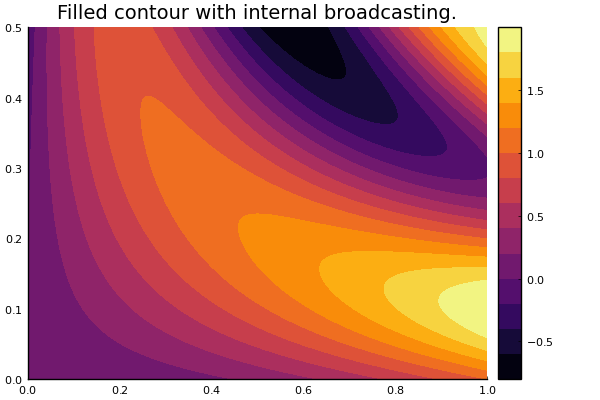

In [30]:
ctplt3 = plot(x, y, f; seriestype=:contourf, title="Filled contour with internal broadcasting.")

### 3.3 3D Plots

3D plotting provides another useful way to visualise data. It generalises quite naturally from the 2D examples that we have already gone through (but with 3D data). Therefore, below we will just add several examples that clarify the usage in 3D plots.

# 3.3.1 Scatter and Line Plots

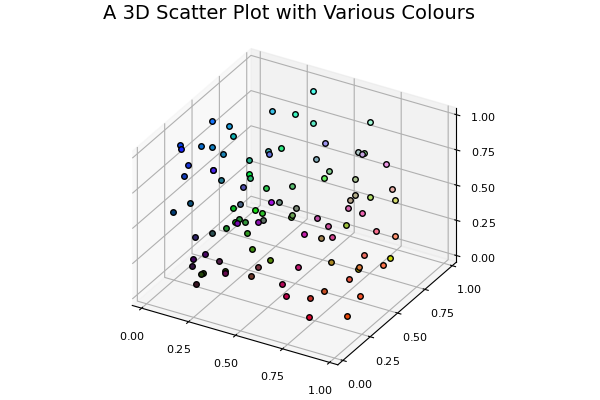

In [31]:
sctx3d = rand(100)
scty3d = rand(100)
sctz3d = rand(100)
cols = RGB.(sctx3d, scty3d, sctz3d);
plot(sctx3d, scty3d, sctz3d; title="A 3D Scatter Plot with Various Colours", st=:scatter, c=cols, label=false)

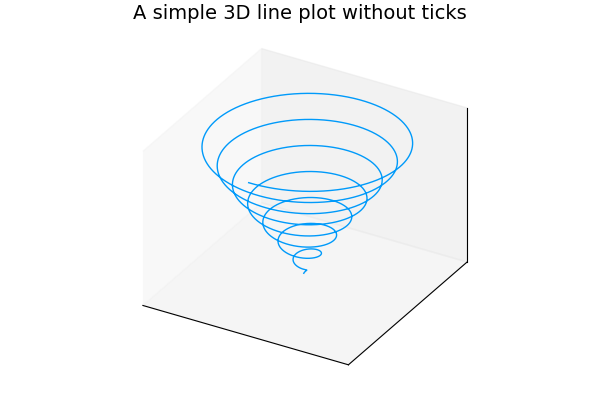

In [32]:
t = 0:0.001:15pi;
linex3d = t .* sin.(t)
liney3d = t .* cos.(t)
linez3d = t
plot(linex3d, liney3d, linez3d; title="A simple 3D line plot without ticks", label=false, ticks=false)

#### 3.3.1 Surface Plots

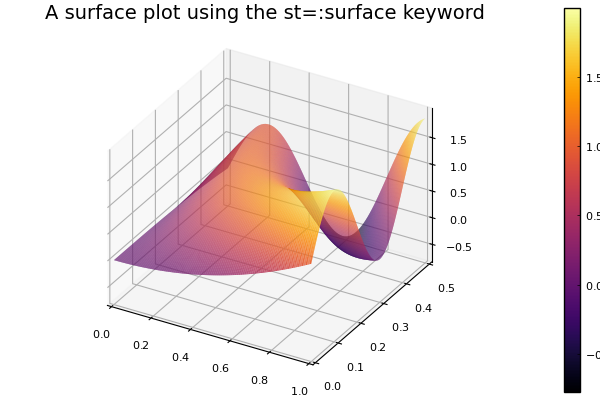

In [39]:
plot(X, Y, Z; st=:surface, title="A surface plot using the st=:surface keyword")

### 3.4 Colour Maps

It can be useful to define a custom colourmap for surface and contour plots. The usage is through the color keywords. There are several pre-defined colourmaps which can be found in the [documentation](https://docs.juliaplots.org/latest/generated/colorschemes/). The default colour map is "heat". A custom colour gradient may be defined by ``cgrad(cs, [transitions])``.

In [34]:
customcs = cgrad([RGB(0,0.4,0.1), RGB(0.5,1,0.1), RGB(0.5,1,0.9), RGB(1,0.1,0.1)], [0.1,0.4,0.9], scale=false)

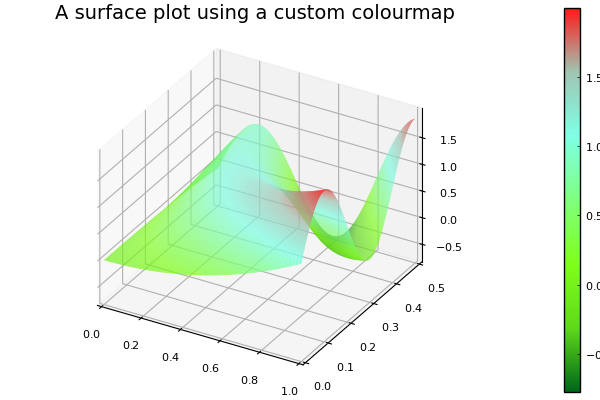

In [40]:
plot(X, Y, Z; st=:surface, c=customcs, title="A surface plot using a custom colourmap")

#### 3.4.1 Colour Map pitfalls

While a colour map is a powerful visual tool it is important to be aware of two pitfalls: circular colour maps and non-linear colour perception. The first is straightforward: several beautiful rainbow colour maps "wrap around" meaning that the lowest value smoothly transitions to the highest value. This can make for a nice visual effect but it is only useful when the data has a ring topology (most data does not!). Therefore it can hide discontinuities in the data and lead your reader to drawing the wrong conclusion. Compare the following contour plots.

In [36]:
x = -1:0.01:1;
y = -1:0.01:1;
f(x, y) = mod(x, 0.75)

f (generic function with 1 method)

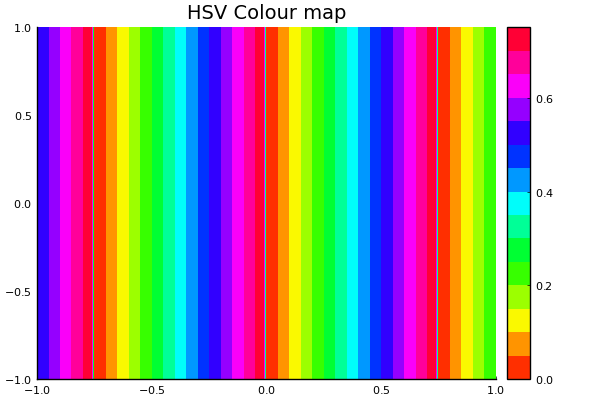

In [37]:
plot(x,y,f;st=:contourf, c=:hsv, title="HSV Colour map")

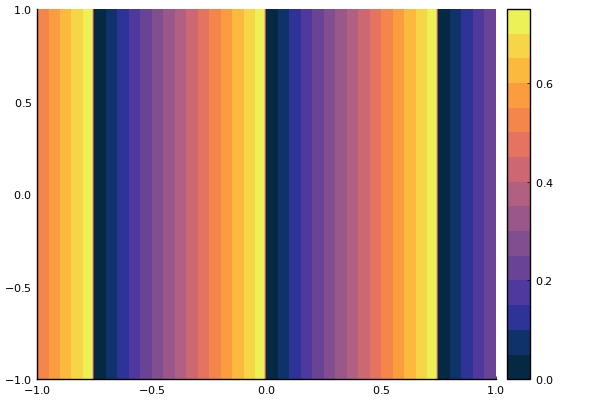

In [38]:
plot(x,y,f;st=:contourf, c=:thermal)

## 4.0 Ecosystem: Recipes, StatsPlots, GraphPlots

As we have seen, Julia has quite a sophisticated plotting environment with lots of user-customisable features. There are a substantial number of default plots included in the base Plots.jl package but we might find ourselves repeating a custom plot type multiple times. In these instances we are given the ``@recipe`` macro to define our own custom recipe. This is outside the scope of this course but more information can be found in the [documentation](https://docs.juliaplots.org/latest/recipes/).

Different communities have made use of these recipes to create their own plotting packages and a plotting ecosystem has begun to develop. The largest packages are StatsPlots and GraphPlots which are specalised for use with Statistics and mathematical Graphs. There are a number of basic statistics plots offered by the plots package and we will cover these and StatsPlots in the Data and Statistics workbook.

## 5.0 Data Exploration: Manipulate and Animate

It is often helpful to dynamically visualise data in the exploratory phase of a project and Julia offers two powerful tools to do this: manipulate and animate. The manipulate functionality allows us to program a 

## 6.0 Putting it all together